##Logistic Regression for classification of Apple and Banana from following dataset:
https://www.kaggle.com/moltean/fruits

In [ ]:
#Run this section according to the need of removing folders from current folder
#!rm -rf Fruits
#!rm -rf Fruits.zip
#!rm -rf Train
#!rm -rf Test

In [ ]:
%tensorflow_version 2.x 

In [ ]:
import tensorflow as tf
print(tf.version) 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from os import getcwd

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
#Checking present working directory
!pwd

/content


In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Getting the dataset from the drive
path_dataset = f"{getcwd()}/../content/drive/My Drive/Datasets/Fruits.zip"

#UnZipping the File
from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os 
Apple = os.path.join('../content/Fruits/Apple')
Banana = os.path.join('../content/Fruits/Banana')

In [ ]:
print('Total Apple Images:',len(os.listdir(Apple)))
print('Total Banana Images:',len(os.listdir(Banana)))

Total Apple Images: 492
Total Banana Images: 490


In [ ]:
from glob import glob
import os.path
from shutil import copy2

path = '../content/Fruits'
test = '../content/Test'
train = '../content/Train'

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)

In [ ]:
for folder in glob(path+'/*'):
		#print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[3]+'/'
		folder_train = train+'/'+folder.split('/')[3]+'/'
		# print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		# iterate from 0..test and copy to test
		# iterate test to end and copy to train
		for idx, im in enumerate(glob(folder+'/*')):
			#print(im)
			if idx <= train_num:
			# copy to test
				copy2(im, folder_train)
			else:
			# copy to train
				copy2(im, folder_test)



no of images in this folder: 492
no of images in this folder: 490


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
# Directory with our training Apple pictures
train_apple_dir = os.path.join('../content/Train/Apple')

# Directory with our training Banana pictures
train_banana_dir = os.path.join('../content/Train/Banana')

In [ ]:
Apple_files = os.listdir(Apple)
print(Apple_files[:10])
Banana_files = os.listdir(Banana)
print(Banana_files[:10])

['295_100.jpg', 'r_219_100.jpg', 'r_201_100.jpg', 'r_173_100.jpg', '252_100.jpg', '254_100.jpg', 'r_193_100.jpg', 'r_238_100.jpg', 'r_300_100.jpg', 'r_170_100.jpg']
['r_219_100.jpg', 'r_201_100.jpg', 'r_93_100.jpg', 'r_173_100.jpg', '252_100.jpg', '254_100.jpg', 'r_193_100.jpg', 'r_300_100.jpg', 'r_170_100.jpg', 'r_121_100.jpg']


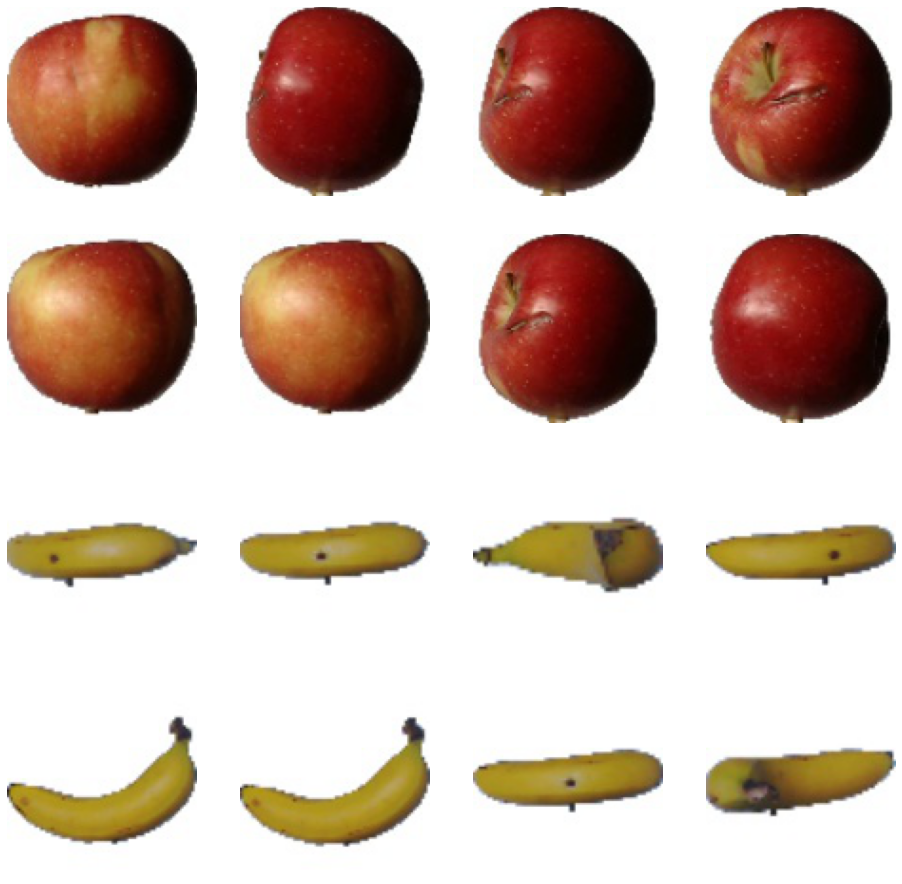

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_apple_pix = [os.path.join(train_apple_dir, fname) 
                for fname in Apple_files[pic_index-8:pic_index]]
next_banana_pix = [os.path.join(train_banana_dir, fname) 
                for fname in Banana_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_apple_pix+next_banana_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
print(len(os.listdir('../content/Train/Apple/')))
print(len(os.listdir('../content/Train/Banana/')))
print(len(os.listdir('../content/Test/Apple/')))
print(len(os.listdir('../content/Test/Banana/')))

394
393
98
97


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR = "../content/Train"
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size = 10,
    class_mode = 'binary',
    target_size = (50,50)
)

VALIDATION_DIR = "../content/Test"
validation_datagen = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 10,
    class_mode = 'binary',
    target_size = (50,50)
)

Found 787 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.0%
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True 

In [ ]:
callbacks = myCallback()
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
79/79 [==============================] - 2s 30ms/step - loss: 0.2840 - acc: 0.9149 - val_loss: 0.0647 - val_acc: 0.9795
Epoch 2/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0602 - acc: 0.9822 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 3/10
77/79 [============================>.] - ETA: 0s - loss: 0.0350 - acc: 0.9948
Reached 99.0% accuracy so cancelling training!
79/79 [==============================] - 2s 30ms/step - loss: 0.0356 - acc: 0.9936 - val_loss: 0.0184 - val_acc: 0.9949


Text(0.5, 1.0, 'Training and validation loss')

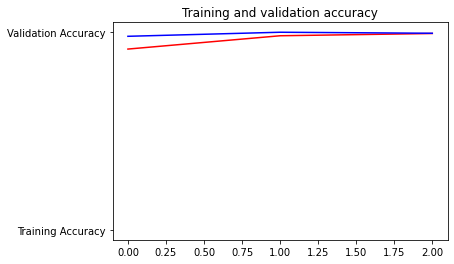

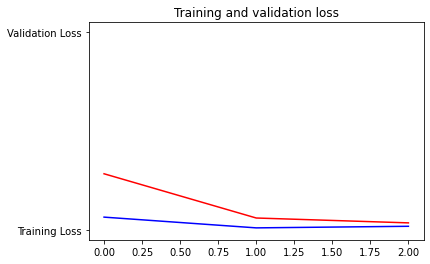

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


#End of Code